In [61]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import signal 
import pandas as pd

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.postprocessing as pp

# This makes the plots appear inside the notebook
%matplotlib inline

## Load data

We load the data from the output file.

In [98]:
rep='../../output/'
patientdir='ID_2'
study_name='widow5min'
file=glob.glob(rep+patientdir+study_name+'ABP.txt', recursive=True)[0]

data=pd.read_csv(file, decimal='.', delimiter='\t')

In [99]:
rep='../../output/'
patientdir='ID_2'
study_name='window5min'
file=glob.glob(rep+patientdir+study_name+'ICP.txt', recursive=True)[0]

data2=pd.read_csv(file, decimal='.', delimiter='\t')

In [100]:
data

#time  Number of corrected RRi  Heart frequency (Hz)  Power hr (ms2)  \
0       180.0                 0.263789                 1.387    2.680000e+10   
1       240.0                 0.351090                 1.390    1.684000e+10   
2       300.0                 0.047146                 1.400    1.237000e+10   
3       360.0                 0.025126                 1.427    1.104000e+10   
4       420.0                 0.051813                 1.387    1.040000e+10   
...       ...                      ...                   ...             ...   
1467  88200.0                 0.297297                 1.537    1.280000e+10   
1468  88260.0                 0.282805                 1.553    7.602000e+09   
1469  88320.0                 0.280899                 1.550    9.808000e+09   
1470  88380.0                 0.314607                 1.550    1.221000e+10   
1471  88440.0                 0.252273                 1.553    1.865000e+10   

      Power hr integrated (ms2)  Mean ABP (mmHg)  STD ABP (mmHg)  \
0                   466100000.0            105.7           25.21   
1                   474300000.0            105.9           24.80   
2                   509200000.0            105.2           24.22   
3                   539200000.0            105.2           24.02   
4                   495800000.0            106.6           25.63   
...                         ...              ...             ...   
1467                346400000.0            111.2           23.53   
1468                356100000.0            110.1           23.10   
1469                373500000.0            109.9           22.99   
1470                377300000.0            109.2           22.98   
1471                345400000.0            107.1           22.43   

      Amplitude mean (mmHg)  Amplitude std (mmHg)  Psys (mmHg)  ...  \
0                     82.92                 6.239        162.7  ...   
1                     80.67                 4.030        160.6  ...   
2                     77.01                 6.875        156.6  ...   
3                     75.39                 7.313        155.0  ...   
4                     74.32                 8.581        154.1  ...   
...                     ...                   ...          ...  ...   
1467                  69.86                 4.806        153.7  ...   
1468                  69.54                 5.596        152.6  ...   
1469                  69.21                 4.969        152.0  ...   
1470                  68.53                 5.886        151.1  ...   
1471                  67.42                 5.718        148.4  ...   

      Power HF (ms2)  Power Total (ms2)    LF/HF  Peak VLF (Hz)  Peak LF (Hz)  \
0             105.20              169.8  0.27510       0.003343       0.04680   
1              91.19              180.1  0.38680       0.003343       0.05015   
2              89.43              216.8  0.45190       0.003343       0.04680   
3             191.70              369.1  0.43820       0.006686       0.04680   
4             272.90              448.5  0.40140       0.003343       0.11370   
...              ...                ...      ...            ...           ...   
1467          581.70              693.0  0.03210       0.006686       0.09026   
1468          435.10              595.5  0.07033       0.010030       0.04012   
1469          475.00              606.5  0.07903       0.010030       0.04680   
1470          364.40              428.6  0.05389       0.006686       0.11030   
1471          268.90              300.1  0.05230       0.003343       0.04012   

      Peak HF (Hz)  Fraction LF (%)  Fraction HF (%)  time normalized  \
0           0.2608           21.570            78.43         -27998.0   
1           0.2708           27.890            72.11         -27938.0   
2           0.2708           31.130            68.87         -27878.0   
3           0.2440           30.470            69.53         -27818.0   
4           0.2440           28.640    

## Visualisation 

Let's visualize the features.

In [102]:
variables=data.columns[1:]

In [103]:
variablesicp=data2.columns[1:]

In [104]:
variablesicp

Index(['Heart frequency ICP (Hz)', 'Power hr ICP (ms2)',
       'Respiratory frequency mean (Hz)', 'Respiratory frequency std (Hz)',
       'Mean ICP (mmHg)', 'STD ICP (mmHg)', 'Mean AMP (mmHg)',
       'STD AMP (mmHg)', 'Psys ICP mean (mmHg)', 'Psys STD ICP (mmHg)',
       'Pdia ICP mean (mmHg)', 'Pdia STD ICP  (mmHg)', 'Slope', 'Error slope',
       'Intercept', 'rvalue', 'pvalue', 'std err', 'time normalized',
       'Power ICP integrated', 'Unnamed: 21'],
      dtype='object')

Let's take a look at our features during all night.

<ipython-input-105-8e18730d0f14>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


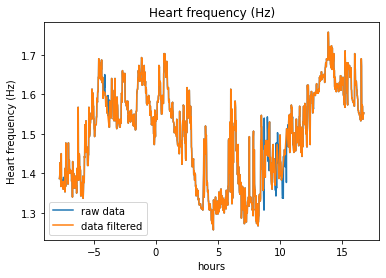

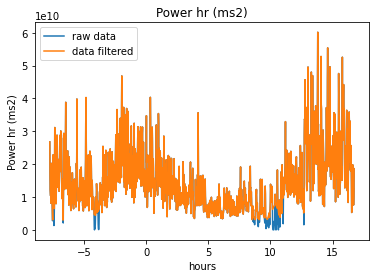

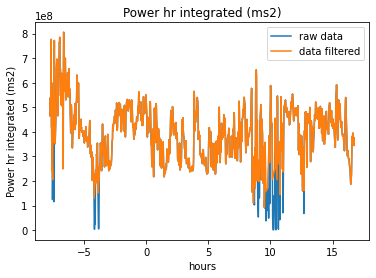

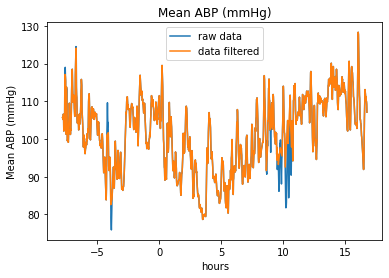

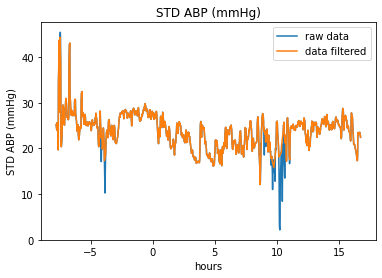

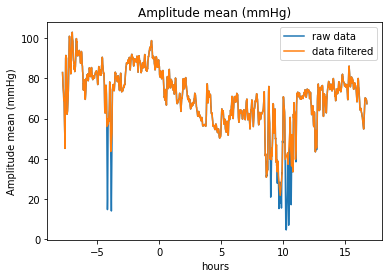

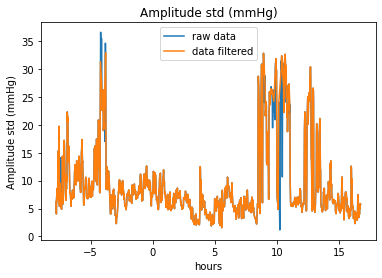

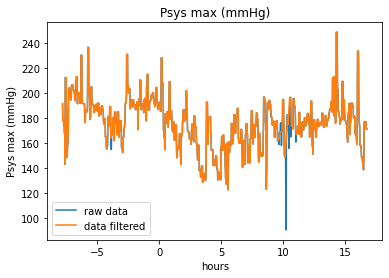

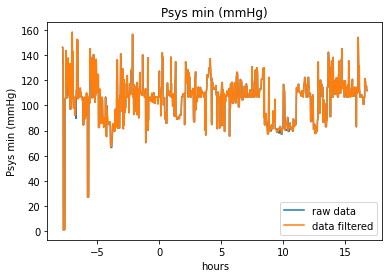

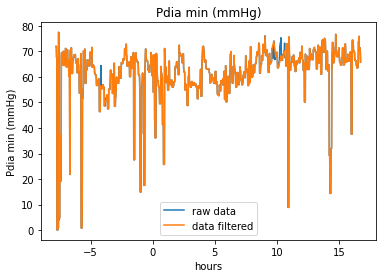

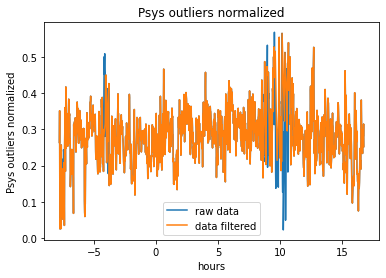

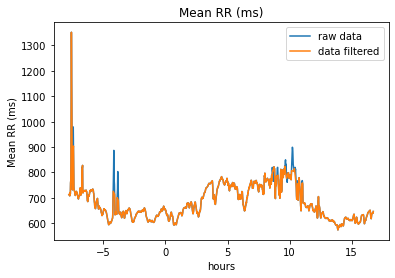

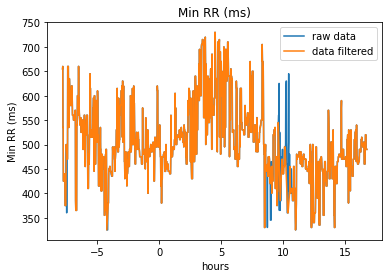

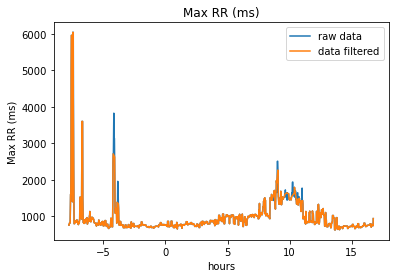

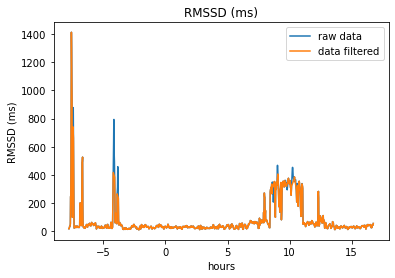

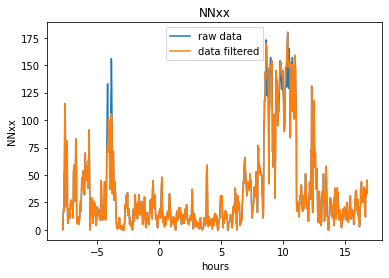

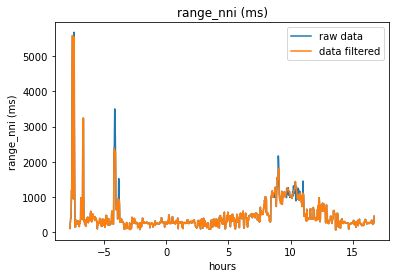

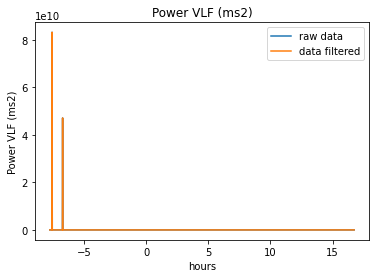

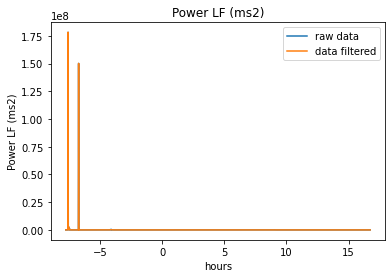

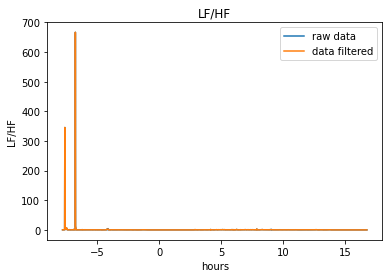

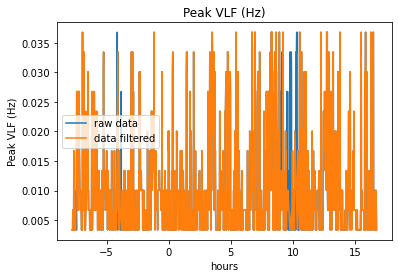

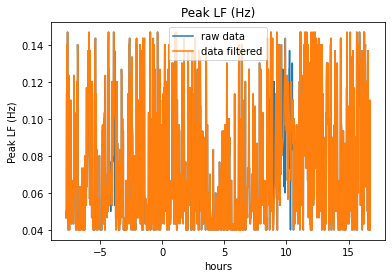

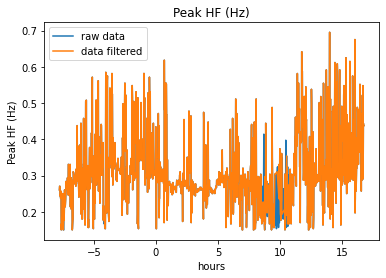

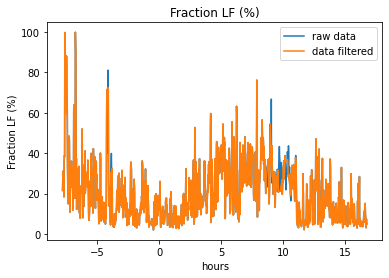

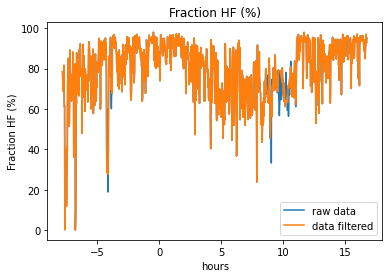

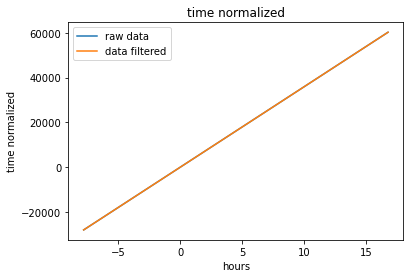

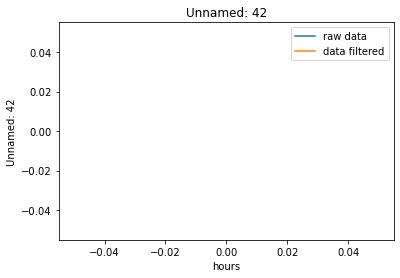

In [105]:
filter_values=np.where(data['Power hr (ms2)']>np.max(data['Power hr (ms2)'])*5/100)[0]
filter_values2=np.where(data['Power hr integrated (ms2)']>np.max(data['Power hr integrated (ms2)'])*20/100)[0]

for var in variables :
    plt.figure()
    plt.plot(data['time normalized']/60/60,data[var],label='raw data')
    plt.plot(data['time normalized'][filter_values]/60/60,data[var][filter_values],label='data filtered')
    plt.xlabel('hours')
    plt.ylabel(var)
    plt.title(var)
    #plt.xlim([16.25,16.5])
    #plt.ylim([0,50])
    plt.legend()

Let's see their histograms to get an idea of the values distribution.

<ipython-input-106-fbc3ebaf24c0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-106-fbc3ebaf24c0>:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


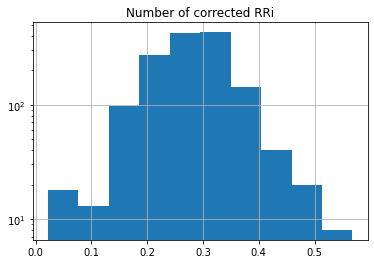

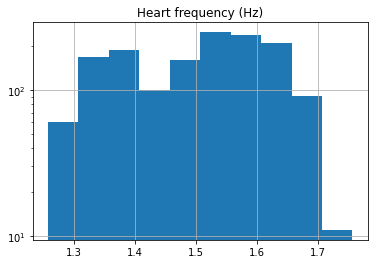

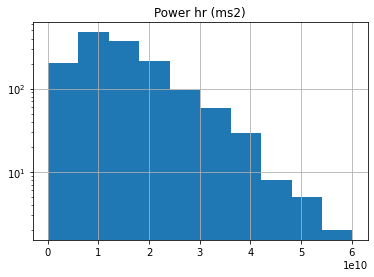

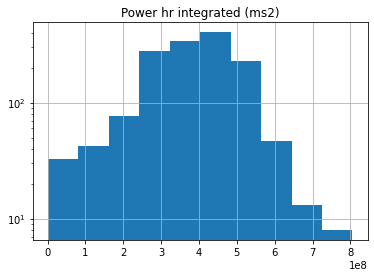

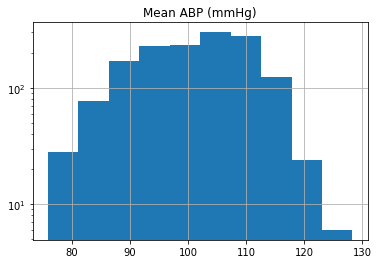

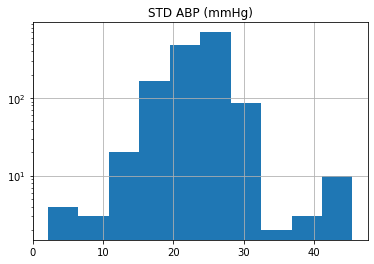

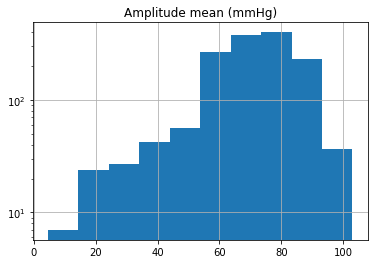

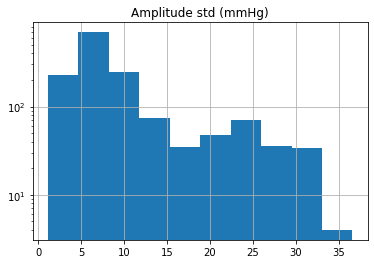

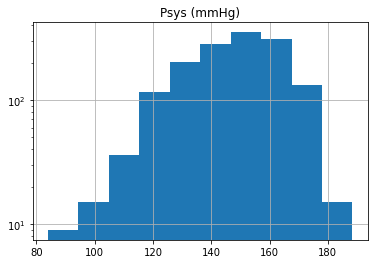

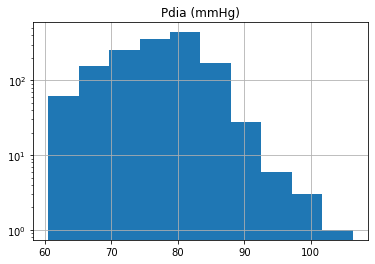

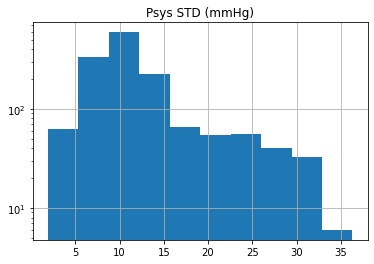

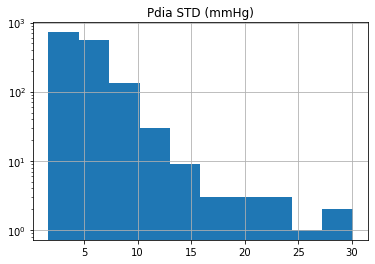

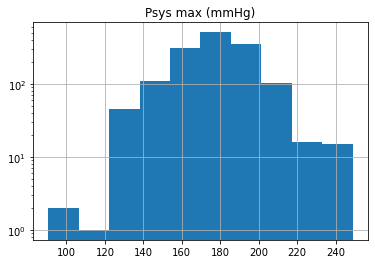

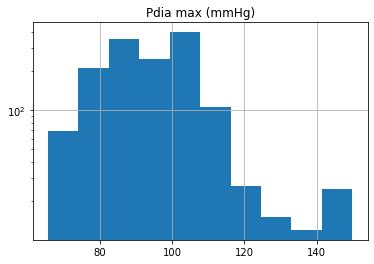

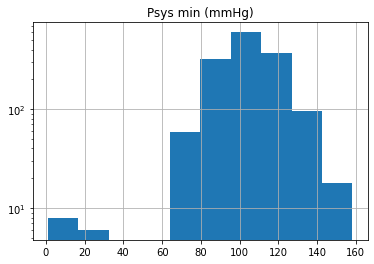

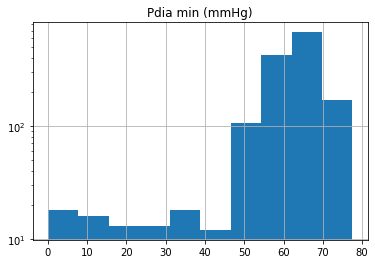

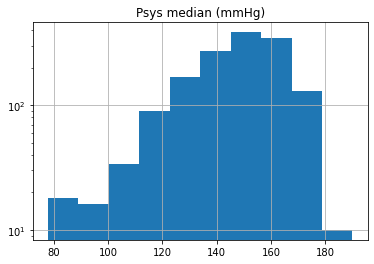

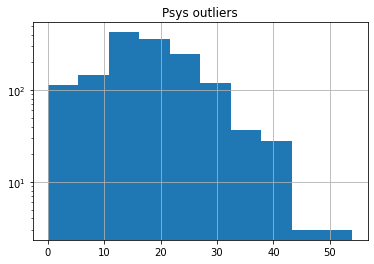

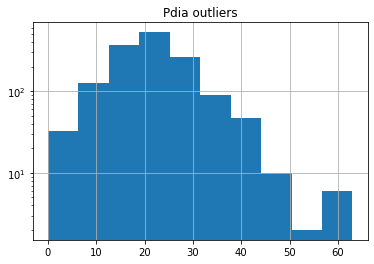

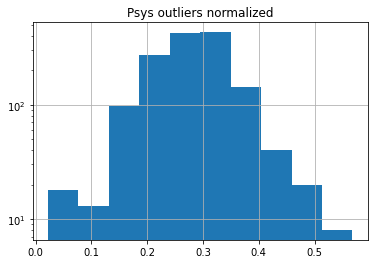

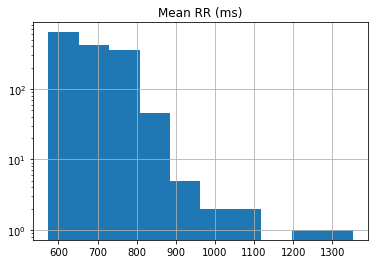

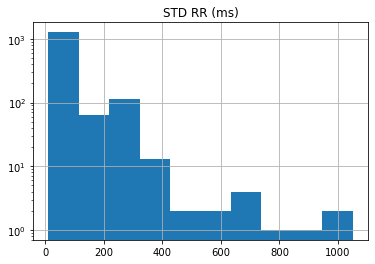

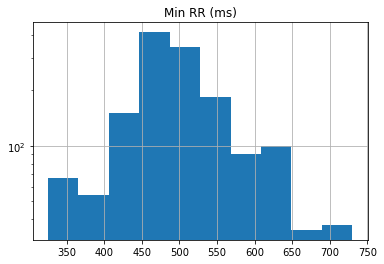

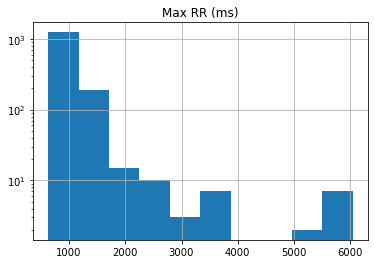

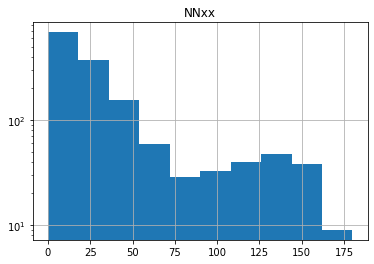

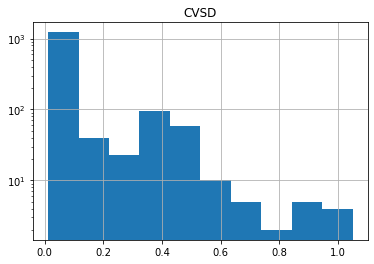

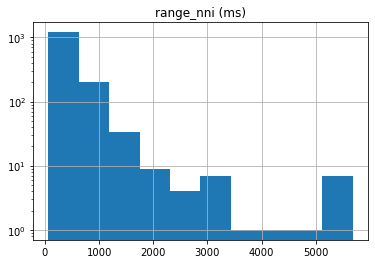

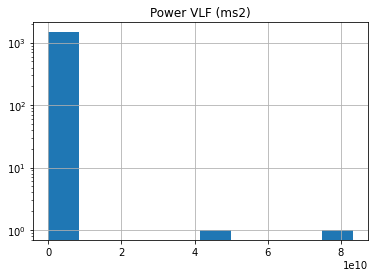

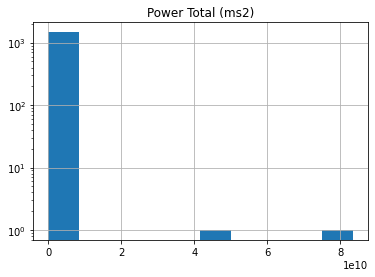

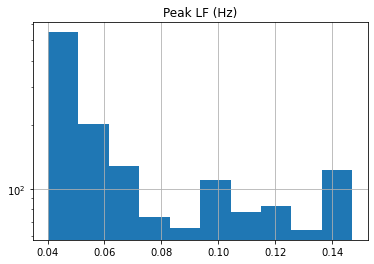

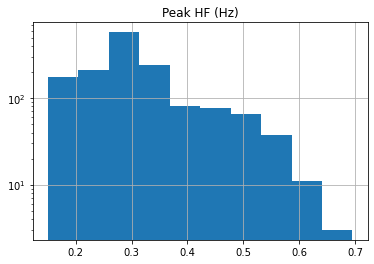

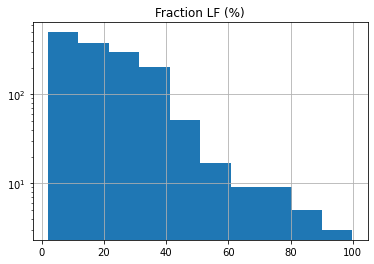

In [106]:
for var in variables :
    plt.figure()
    data[var].hist()
    plt.yscale('log')
    plt.title(var)

## Correction 

First we will correct outliers with the function in 'postprocessing' library. Replace represents the value for replacing the outlier and n the number of standard deviation to define the interval of correct values.

## Smoothing 

Then we will smooth data with the function 'signal.savgol_filter()'  from scipy library.

- Heart rate

Let's smooth the heart rate and compare it with raw data. After that we will plot the histogram of heart rate smoothed.

Text(0.5, 1.0, 'Heart frequency (Hz)')

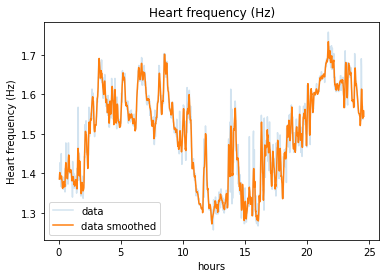

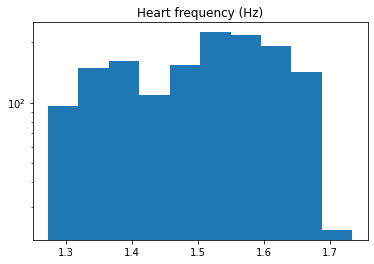

In [107]:
var='Heart frequency (Hz)'
#smoothing
hr_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.2, label='data')
plt.plot(data['#time']/60/60,hr_smooth, label='data smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

plt.figure()
plt.hist(hr_smooth)
plt.yscale('log')
plt.title(var)

Let's compare with heart rate founded in ICP signal.

Text(0.5, 1.0, 'Comparison of different heart frequnecy founded')

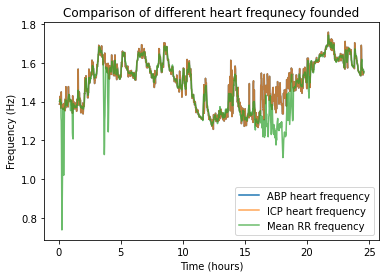

In [108]:
plt.plot(data['#time']/3600,data['Heart frequency (Hz)'],label='ABP heart frequency')
plt.plot(data['#time']/3600,data['Heart frequency (Hz)'], label='ICP heart frequency',alpha=0.7)
plt.plot(data['#time']/3600,1/(data['Mean RR (ms)']*1e-3), label='Mean RR frequency',alpha=0.7)
plt.legend()
#plt.xlim([11.75,12])
plt.xlabel('Time (hours)')
plt.ylabel('Frequency (Hz)')
plt.title('Comparison of different heart frequnecy founded')

- Systolic pressure

We repeat same steps as for heart rate.

Text(0.5, 1.0, 'Psys (mmHg)')

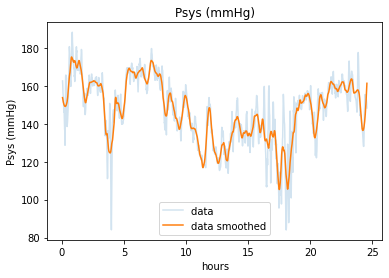

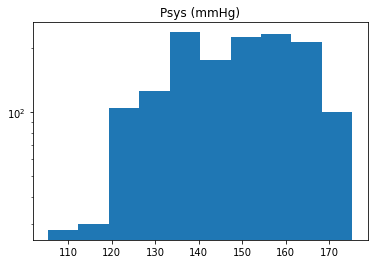

In [16]:
var='Psys (mmHg)'
#smoothing
psys_smooth=signal.savgol_filter(data[var],window_length=45, polyorder=2)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.2,label='data ')
plt.plot(data['#time']/60/60,psys_smooth, label='data smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

plt.figure()
plt.hist(psys_smooth)
plt.yscale('log')
plt.title(var)

- Diastolic pressure 

Text(0.5, 1.0, 'Pdia (mmHg)')

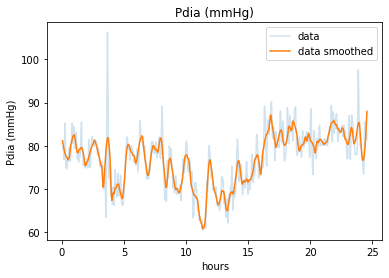

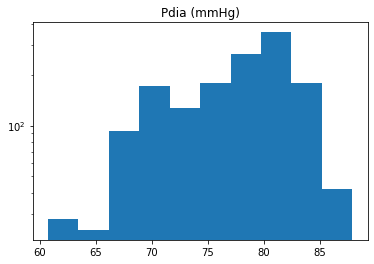

In [17]:
var='Pdia (mmHg)'

#smoothing 
pdia_smooth=signal.savgol_filter(data[var],window_length=45, polyorder=2)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.2, label='data')
plt.plot(data['#time']/60/60,pdia_smooth, label='data smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

plt.figure()
plt.hist(pdia_smooth)
plt.yscale('log')
plt.title(var)

Let's check now that the systolic pressure is always superior to diastolic pressure by calculating the difference.

Text(0, 0.5, 'Pressure (mmHg)')

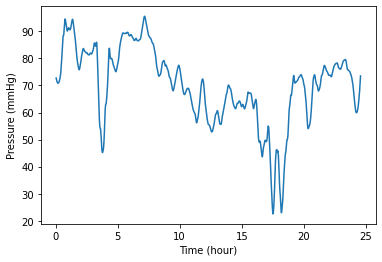

In [18]:
plt.plot(data['#time']/60/60,psys_smooth-pdia_smooth)
plt.xlabel('Time (hour)')
plt.ylabel('Pressure (mmHg)')

We can see that difference between sysolic pressure and diastolic pressure is always positive so there is no value to correct.

Let's plot both of them on the same graphic.

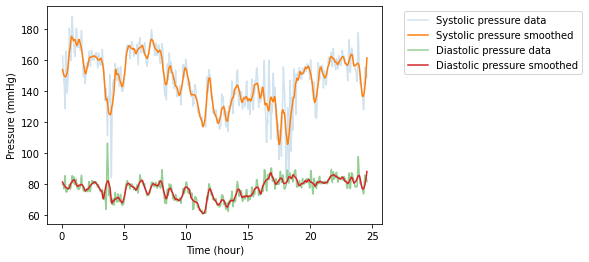

In [19]:
plt.plot(data['#time']/60/60,data['Psys (mmHg)'],alpha=0.2, label='Systolic pressure data')
plt.plot(data['#time']/60/60,psys_smooth, label='Systolic pressure smoothed')
plt.plot(data['#time']/60/60,data['Pdia (mmHg)'],alpha=0.5, label='Diastolic pressure data')
plt.plot(data['#time']/60/60,pdia_smooth, label='Diastolic pressure smoothed')
plt.xlabel('Time (hour)')
plt.ylabel('Pressure (mmHg)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#rajouter non moyennée en alpha choisir couleur 
#linewidth= 

- Mean RR

Text(0.5, 1.0, 'Mean RR (ms)')

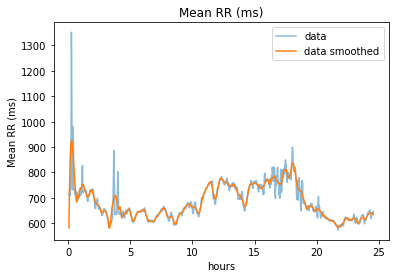

In [116]:
var='Mean RR (ms)'
meanrr_smooth=signal.savgol_filter(data[var],window_length=61, polyorder=4)


plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
plt.plot(data['#time']/60/60,meanrr_smooth, label='data smoothed')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

Let's compare our results with the following study. 

References of the paper : T. Penzel, J.W. Kantelhardt, L. Grote, J.-H. Peter, A. Bunde, « Comparison of detrended fluctuation analysis and spectral analysis for heart rate variability in sleep and sleep apnea », IEEE Trans. Biomed. Eng. 50 (10) (2003) 1143–1151.

For that, we plot the histogram of our values. We plot continuous line to represent the average of values founded in the study and the dotted lines to represent the standard deviation of values.

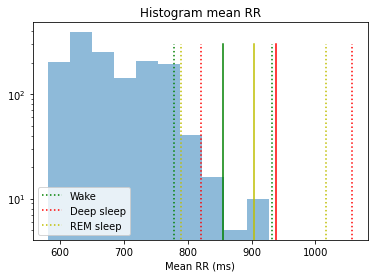

In [117]:
plt.figure()
plt.hist(meanrr_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram mean RR')
plt.xlabel('Mean RR (ms)')

x=855
dx=77
ymax=3e2
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:',label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=939
dx=119
ymax=3e2
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:',label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=903
dx=114
ymax=3e2
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')

plt.legend(loc='lower left')

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotmeanRR')

#rajouter axes, changer titre  metre hist mean 

We can see our values of Mean of RR intervals are close to values in the literature even if the mean is globally lower than in the article. This can be because in the study the article patients are healthy and in our study the patient is sick.

- STD RR

Text(0.5, 0, 'STD RR (ms)')

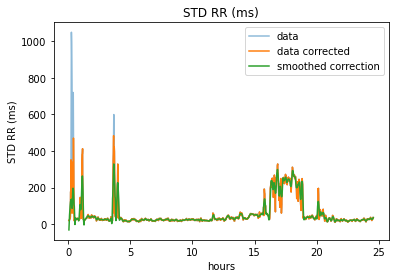

In [118]:
var='STD RR (ms)'
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.mean,5)
stdrr_smooth=signal.savgol_filter(var_correction[0],window_length=15, polyorder=2)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
plt.plot(data['#time']/60/60,var_correction[0], label='data corrected')
plt.plot(data['#time']/60/60,stdrr_smooth, label='smoothed correction')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

plt.figure()
plt.hist(data[var],alpha=0.5)
plt.yscale('log')
plt.title('Histogram standard deviation RR interval')
plt.xlabel('STD RR (ms)')

We can see that our values are very spreaded out because of some outliers like between 15 and 20 hours for example. So we will apply a filter on our data to remove our values.

### Filter

We will choose a threshold at 125 ms for the standard deviation to get the values to remove.

In [119]:
index_filter=np.where(data['STD RR (ms)']<=125)[0]
filtered_std=data['STD RR (ms)'][index_filter]

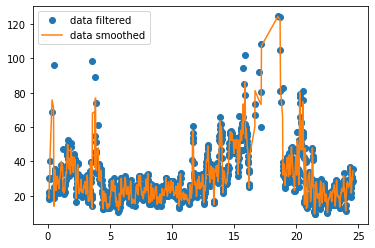

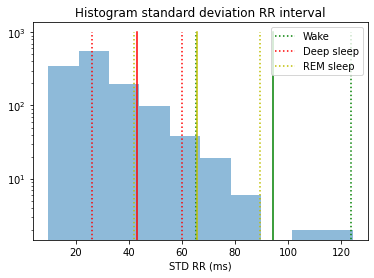

In [120]:
plt.plot(data['#time'][index_filter]/60/60,filtered_std,'o', label='data filtered')
data_smooth=signal.savgol_filter(filtered_std,window_length=5, polyorder=2)
plt.plot(data['#time'][index_filter]/60/60,data_smooth, label='data smoothed')
plt.legend()
plt.plot()
plt.figure()
plt.hist(data_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram standard deviation RR interval')
plt.xlabel('STD RR (ms)')

x=94.4
dx=29.2
ymax=1e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=43
dx=17
ymax=1e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=65.6
dx=23.8
ymax=1e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend(loc='upper right')
plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotSTDRRfil')

In [121]:
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='raw data')
plt.plot(data['#time'][index_filter]/60/60,filtered_std,'o',linewidth=0.1, label='data filtered')
plt.ylim([0,300])
plt.legend()
plt.title('Standard deviation of RR intervals')
plt.xlabel('Time (hour)')
plt.ylabel('STD (ms)')

Text(0, 0.5, 'STD (ms)')

We use the same study than before to compare our results :

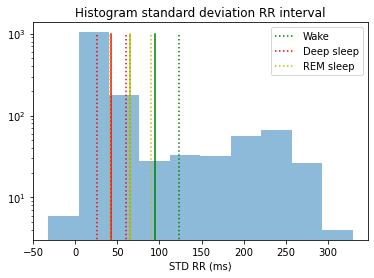

In [122]:
plt.figure()
plt.hist(stdrr_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram standard deviation RR interval')
plt.xlabel('STD RR (ms)')

x=94.4
dx=29.2
ymax=1e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=43
dx=17
ymax=1e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=65.6
dx=23.8
ymax=1e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend()

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotSTDRR')

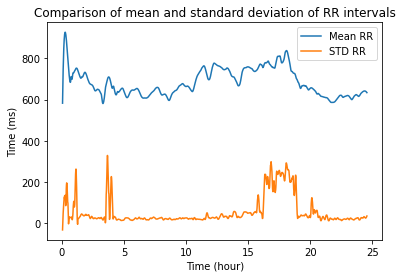

In [123]:
plt.plot(data['#time']/60/60,meanrr_smooth, label='Mean RR')
plt.plot(data['#time']/60/60,stdrr_smooth, label='STD RR')
plt.xlabel('Time (hour)')
plt.ylabel('Time (ms)')
plt.title('Comparison of mean and standard deviation of RR intervals')
plt.legend()

In [124]:
nb_correction

10

We can see that results between our study and the article are very close.

- Power VLF

As spectrum have very high values we will do our correction and smoothing on a log scale to correct outliers.

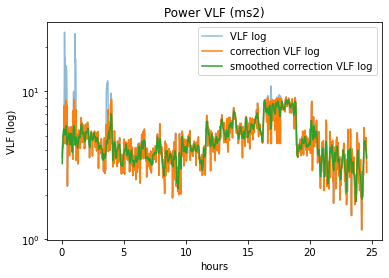

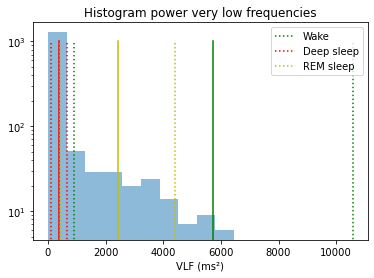

In [125]:
var='Power VLF (ms2)'

#log scale 
data['VLF (log)']=np.log(data[var])
#correction
var_correction,nb_correction,index_corr=pp.correction(data['VLF (log)'],7200,np.median,2)
#smoothing                                                    
vlflog_smooth=signal.savgol_filter(var_correction[0],window_length=15, polyorder=2)
#back normal scale 
vlf_smooth=np.exp(vlflog_smooth)

plt.figure()
plt.plot(data['#time']/60/60,data['VLF (log)'], alpha=0.5, label='VLF log')
plt.plot(data['#time']/60/60,var_correction[0], label='correction VLF log')
plt.plot(data['#time']/60/60,vlflog_smooth, label='smoothed correction VLF log')
plt.yscale('log')
plt.xlabel('hours')
plt.ylabel('VLF (log)')
plt.title(var)
plt.legend()

plt.figure()
plt.hist(vlf_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power very low frequencies')
plt.xlabel('VLF (ms²)')


x=5726
dx=4841
ymax=1e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=389
dx=275
ymax=1e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=2415
dx=1994
ymax=1e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend(loc='upper right')

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotVLF')

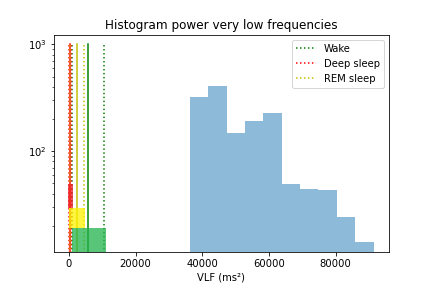

We can see that our values are much higher than values in the paper in very low frequencies.

In [126]:
nb_correction

40

#### Filter

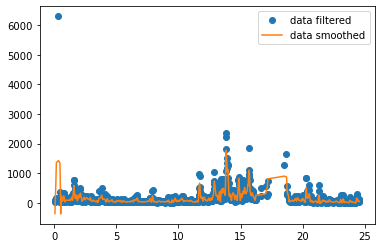

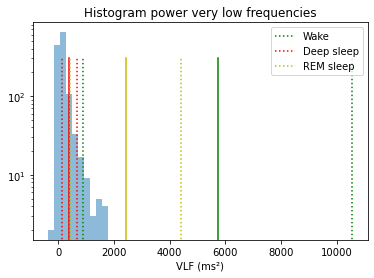

In [127]:
filtered_vlf=data['Power VLF (ms2)'][index_filter]

plt.plot(data['#time'][index_filter]/60/60,filtered_vlf,'o', label='data filtered')
data_smooth=signal.savgol_filter(filtered_vlf,window_length=11, polyorder=2)
plt.plot(data['#time'][index_filter]/60/60,data_smooth,label='data smoothed')
plt.legend()
plt.plot()

plt.figure()
plt.hist(data_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power very low frequencies')
plt.xlabel('VLF (ms²)')


x=5726
dx=4841
ymax=3e2
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=389
dx=275
ymax=3e2
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=2415
dx=1994
ymax=3e2
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend(loc='upper right')

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotVLFfil')

In [128]:
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='raw data')
plt.plot(data['#time'][index_filter]/60/60,filtered_vlf,'o',linewidth=0.1, label='data filtered')
plt.ylim([0,3000])
plt.legend()
plt.title('VLF')
plt.xlabel('Time (hour)')
plt.ylabel('Power (ms²)')

Text(0, 0.5, 'Power (ms²)')

- Power LF

We repeat the same steps as for VLF.

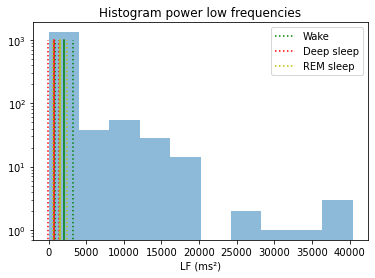

In [129]:
var='Power LF (ms2)'

#log scale 
data['LF (log)']=np.log(data[var])
#correction 
var_correction,nb_correction,index_corr=pp.correction(data['LF (log)'],7200,np.median,3)
#smoothing                                                    
lflog_smooth=signal.savgol_filter(var_correction[0],window_length=15, polyorder=2)

plt.figure()
plt.plot(data['#time']/60/60,data['LF (log)'], alpha=0.5, label='LF log')
plt.plot(data['#time']/60/60,var_correction[0], label='LF log correction')
plt.plot(data['#time']/60/60,lflog_smooth, label='LF log correction smoothed')
plt.xlabel('hours')
plt.ylabel('LF log')
plt.title(var)
plt.legend()

lf_smooth=np.exp(lflog_smooth)

plt.figure()
plt.hist(lf_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power low frequencies')
plt.xlabel('LF (ms²)')

x=2069
dx=1236
ymax=1e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=708
dx=742
ymax=1e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=1502
dx=951
ymax=1e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')
plt.legend()

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotLF')

We can see here that most values are in the range of values from the paper.

In [130]:
nb_correction

18

### Filter 

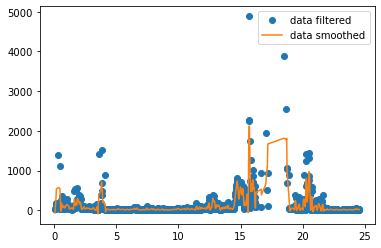

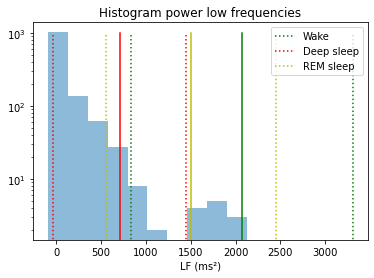

In [131]:
filtered_lf=data['Power LF (ms2)'][index_filter]

plt.plot(data['#time'][index_filter]/60/60,filtered_lf,'o', label='data filtered')
data_smooth=signal.savgol_filter(filtered_lf,window_length=11, polyorder=2)
plt.plot(data['#time'][index_filter]/60/60,data_smooth,label='data smoothed')
plt.legend()
plt.plot()

plt.figure()
plt.hist(data_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power low frequencies')
plt.xlabel('LF (ms²)')

x=2069
dx=1236
ymax=1e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=708
dx=742
ymax=1e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=1502
dx=951
ymax=1e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')
plt.legend(loc='upper right')

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotLFfil')

Text(0, 0.5, 'Power (ms²)')

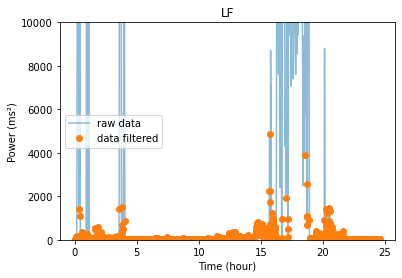

In [132]:
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='raw data')
plt.plot(data['#time'][index_filter]/60/60,filtered_lf,'o',linewidth=0.1, label='data filtered')
plt.ylim([0,10000])
plt.legend()
plt.title('LF')
plt.xlabel('Time (hour)')
plt.ylabel('Power (ms²)')

- Power HF 

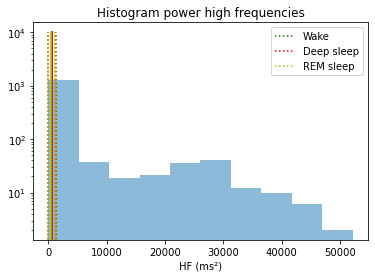

In [133]:
var='Power HF (ms2)'

#log scale 
data['HF (log)']=np.log(data[var])
#correction 
var_correction,nb_correction,index_corr=pp.correction(data['HF (log)'],7200,np.median,3)

#smoothing 
hflog_smooth=signal.savgol_filter(var_correction[0],window_length=21, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data['HF (log)'], alpha=0.5, label='HF log')
plt.plot(data['#time']/60/60,var_correction[0], label='HF log correction')
plt.plot(data['#time']/60/60,hflog_smooth, label='HF log correction smoothed')
plt.xlabel('hours')
plt.ylabel('HF log')
plt.title(var)
plt.legend()

hf_smooth=np.exp(hflog_smooth)

plt.figure()
plt.hist(hf_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power high frequencies')
plt.xlabel('HF (ms²)')


x=725
dx=691
ymax=1e4
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=606
dx=551
ymax=1e4
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=567
dx=544
ymax=1e4
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend()

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotHF')

Here we can see that our values are much more spread out than the values of the paper it can be due to the fact that the patient is sick.

In [134]:
nb_correction

13

### Filter

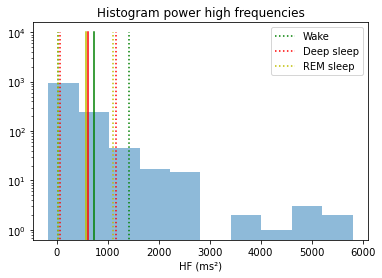

In [135]:
filtered_hf=data['Power HF (ms2)'][index_filter]

plt.plot(data['#time'][index_filter]/60/60,filtered_hf,'o', label='data filtered')
data_smooth=signal.savgol_filter(filtered_hf,window_length=11, polyorder=2)
plt.plot(data['#time'][index_filter]/60/60,data_smooth,label='data smoothed')
plt.legend()
plt.plot()

plt.figure()
plt.hist(data_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram power high frequencies')
plt.xlabel('HF (ms²)')

x=725
dx=691
ymax=1e4
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')

x=606
dx=551
ymax=1e4
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=567
dx=544
ymax=1e4
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')

plt.legend()

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotHFfil')

In [136]:
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='raw data')
plt.plot(data['#time'][index_filter]/60/60,filtered_hf,'o',linewidth=0.1, label='data filtered')
plt.ylim([0,10000])
plt.legend()
plt.title('HF')
plt.xlabel('Time (hour)')
plt.ylabel('Power (ms²)')

Text(0, 0.5, 'Power (ms²)')

- Power total 

Text(0.5, 1.0, 'Power Total (ms2)')

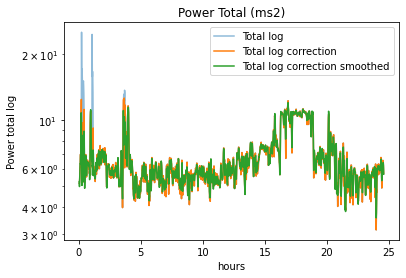

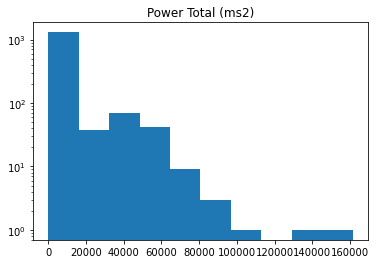

In [137]:
var='Power Total (ms2)'

#log scale 
data['Total (log)']=np.log(data[var])

#correction 
var_correction,nb_correction,index_corr=pp.correction(data['Total (log)'],7200,np.median,3)

#smoothing 
ptot_smooth=signal.savgol_filter(var_correction[0],window_length=9, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data['Total (log)'], alpha=0.5, label='Total log')
plt.plot(data['#time']/60/60,var_correction[0],label='Total log correction')
plt.plot(data['#time']/60/60,ptot_smooth, label='Total log correction smoothed')
plt.xlabel('hours')
plt.ylabel('Power total log')
plt.yscale('log')
plt.title(var)
plt.legend()

plt.figure()
plt.hist(np.exp(ptot_smooth))
plt.yscale('log')
plt.title(var)

In [138]:
nb_correction

19

- LF/HF

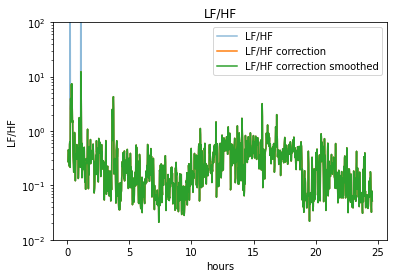

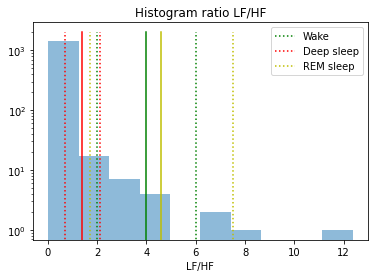

In [139]:
var='LF/HF'
#correction 
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.median,1)
#smoothing 
lfhf_smooth=signal.savgol_filter(var_correction[0],window_length=3, polyorder=2)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5, label='LF/HF')
plt.plot(data['#time']/60/60,var_correction[0], label='LF/HF correction')
plt.plot(data['#time']/60/60,lfhf_smooth, label='LF/HF correction smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.yscale('log')
plt.legend()
plt.ylim([10**-2,10**2])
fig=plt.figure()
figsize=([21,7])
plt.hist(lfhf_smooth,alpha=0.5)
plt.yscale('log')
plt.title('Histogram ratio LF/HF')
plt.xlabel('LF/HF')


x=4
dx=2
ymax=2e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')


x=1.4
dx=0.7
ymax=2e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=4.6
dx=2.9
ymax=2e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend()

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotLFHF')

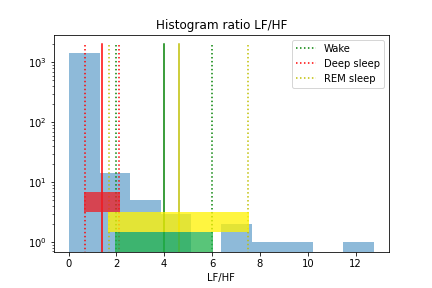

In [140]:
nb_correction

2

In [141]:
(data['#time']/3600)[index_corr[0]]

11    0.233333
62    1.083333
Name: #time, dtype: float64

We can see here on the histogram that values founded of LF/HF are very close to the literature.

### Filter

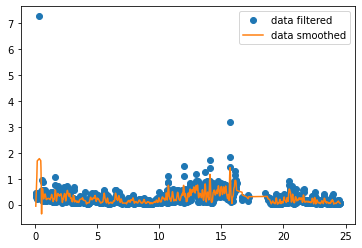

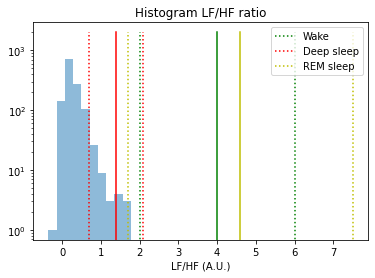

In [142]:
filtered_lfhf=data['LF/HF'][index_filter]

plt.plot(data['#time'][index_filter]/60/60,filtered_lfhf,'o', label='data filtered')
data_smooth=signal.savgol_filter(filtered_lfhf,window_length=11, polyorder=2)
plt.plot(data['#time'][index_filter]/60/60,data_smooth,label='data smoothed')
plt.legend()
plt.plot()

plt.figure()
plt.hist(data_smooth,alpha=0.5, bins=10)
plt.yscale('log')
plt.title('Histogram LF/HF ratio')
plt.xlabel('LF/HF (A.U.)')

x=4
dx=2
ymax=2e3
plt.plot([x,x],[0, ymax],'g')
plt.plot([x+dx,x+dx],[0, ymax],'g:', label='Wake')
plt.plot([x-dx,x-dx],[0, ymax],'g:')


x=1.4
dx=0.7
ymax=2e3
plt.plot([x,x],[0, ymax],'r')
plt.plot([x+dx,x+dx],[0, ymax],'r:', label='Deep sleep')
plt.plot([x-dx,x-dx],[0, ymax],'r:')

x=4.6
dx=2.9
ymax=2e3
plt.plot([x,x],[0, ymax],'y')
plt.plot([x+dx,x+dx],[0, ymax],'y:', label='REM sleep')
plt.plot([x-dx,x-dx],[0, ymax],'y:')


plt.legend(loc='upper right')

plt.savefig(r'C:\Users\Hamon\Documents\Stage\graphes\plotLFHFfil')

Text(0, 0.5, 'LF/HF (A.U.)')

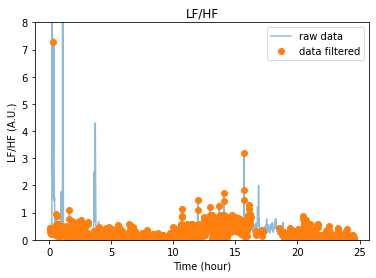

In [143]:
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='raw data')
plt.plot(data['#time'][index_filter]/60/60,filtered_lfhf,'o',linewidth=0.1, label='data filtered')
plt.ylim([0,8])
plt.legend()
plt.title('LF/HF')
plt.xlabel('Time (hour)')
plt.ylabel('LF/HF (A.U.)')

- LFn

Text(0.5, 1.0, 'Fraction LF (%)')

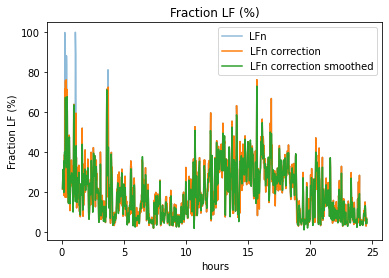

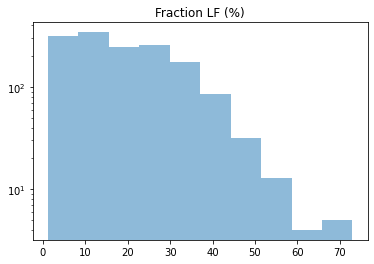

In [144]:
var='Fraction LF (%)'
#correction 
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.median,4)
#smoothing 
lfn_smooth=signal.savgol_filter(var_correction[0],window_length=9, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5, label='LFn')
plt.plot(data['#time']/60/60,var_correction[0], label='LFn correction')
plt.plot(data['#time']/60/60,lfn_smooth, label='LFn correction smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

fig=plt.figure()
plt.hist(lfn_smooth,alpha=0.5)
plt.yscale('log')
plt.title(var)

- HFn

Text(0.5, 1.0, 'Fraction HF (%)')

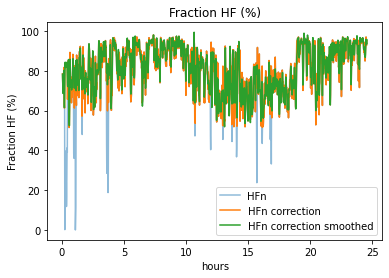

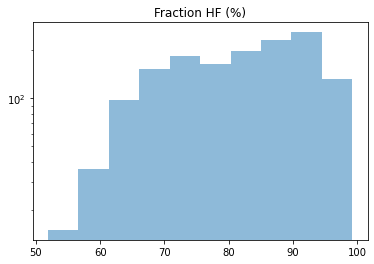

In [145]:
var='Fraction HF (%)'
#correction 
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.median,2)
#smoothing 
hfn_smooth=signal.savgol_filter(var_correction[0],window_length=9, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5, label='HFn')
plt.plot(data['#time']/60/60,var_correction[0], label='HFn correction')
plt.plot(data['#time']/60/60,hfn_smooth, label='HFn correction smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

fig=plt.figure()
plt.hist(hfn_smooth,alpha=0.5)
plt.yscale('log')
plt.title(var)

- Min RR

Text(0.5, 1.0, 'Min RR (ms)')

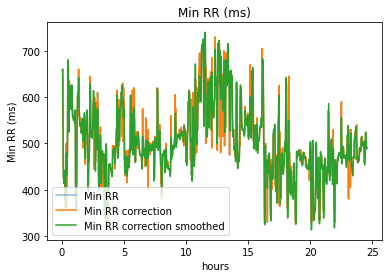

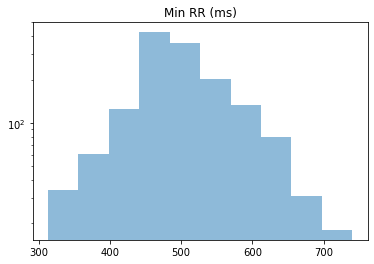

In [147]:
var='Min RR (ms)'
#correction 
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.median,4)
#smoothing 
min_smooth=signal.savgol_filter(var_correction[0],window_length=9, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5, label='Min RR')
plt.plot(data['#time']/60/60,var_correction[0], label='Min RR correction')
plt.plot(data['#time']/60/60,min_smooth, label='Min RR correction smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

fig=plt.figure()
plt.hist(min_smooth,alpha=0.5)
plt.yscale('log')
plt.title(var)

- Max RR

Text(0.5, 1.0, 'Max RR (ms)')

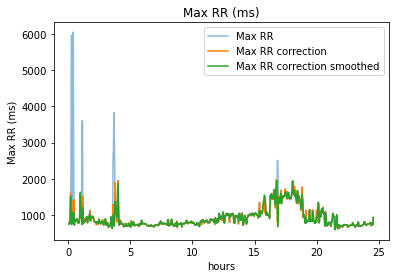

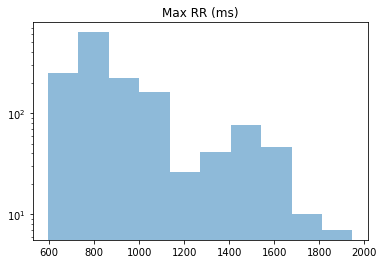

In [148]:
var='Max RR (ms)'
#correction 
var_correction,nb_correction,index_corr=pp.correction(data[var],7200,np.median,2)
#smoothing 
max_smooth=signal.savgol_filter(var_correction[0],window_length=9, polyorder=4)

plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5, label='Max RR')
plt.plot(data['#time']/60/60,var_correction[0], label='Max RR correction')
plt.plot(data['#time']/60/60,max_smooth, label='Max RR correction smoothed')
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.legend()

fig=plt.figure()
plt.hist(max_smooth,alpha=0.5)
plt.yscale('log')
plt.title(var)

#### Visualisation grouped features

Let's plot features on the same figure to compare them.

- Comparison standard deviation with LF/HF ratio

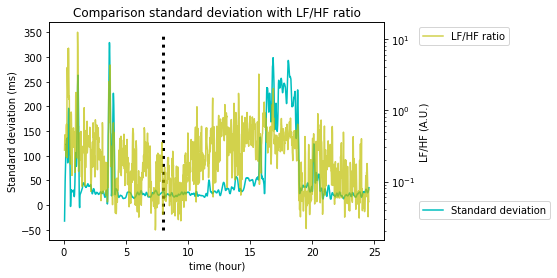

In [149]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, stdrr_smooth,'c', label='Standard deviation')
plt.legend(bbox_to_anchor=(1.09, 0.2), loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,lfhf_smooth,'y', label='LF/HF ratio', alpha=0.7)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Standard deviation (ms)')
ax2.set_ylabel('LF/HF (A.U.)')
ax2.set_yscale('log')
ax.plot([8,8],[-50, 350],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper left')
plt.title('Comparison standard deviation with LF/HF ratio')
plt.draw()

- pressure amplitude with heart rate

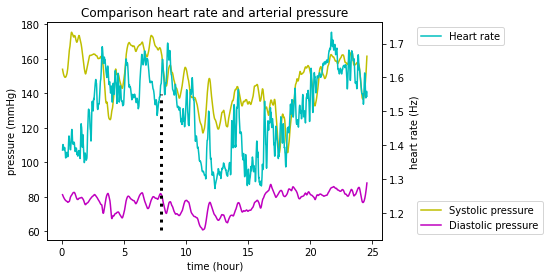

In [150]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, psys_smooth,'y', label='Systolic pressure')
ax.plot(data['#time']/3600,pdia_smooth,'m', label='Diastolic pressure')
plt.legend(bbox_to_anchor=(1.09, 0.2), loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,hr_smooth,'c', label='Heart rate')
ax.set_xlabel('time (hour)')
ax.set_ylabel('pressure (mmHg)')
ax2.set_ylabel('heart rate (Hz)')
ax2.plot([8,8],[1.15, 1.55],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper left')
plt.title('Comparison heart rate and arterial pressure')
plt.draw()

- Powers with STD RR

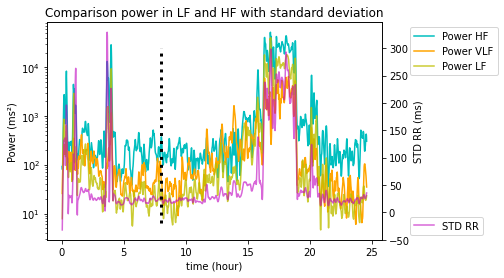

In [151]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, hf_smooth,'c', label='Power HF')
ax.plot(data['#time']/3600, vlf_smooth,'orange', label='Power VLF')
ax.plot(data['#time']/3600, lf_smooth,'y', label='Power LF',alpha=0.8)
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,stdrr_smooth,'m', label='STD RR', alpha=0.6)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Power (ms²)')
ax2.set_ylabel('STD RR (ms)')
ax.set_yscale('log')
ax2.plot([8,8],[-20,300],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.07, 0.0), loc='lower left')
plt.title('Comparison power in LF and HF with standard deviation')
plt.draw()

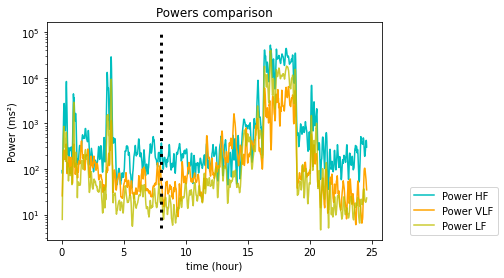

In [152]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, hf_smooth,'c', label='Power HF')
ax.plot(data['#time']/3600, vlf_smooth,'orange', label='Power VLF')
ax.plot(data['#time']/3600, lf_smooth,'y', label='Power LF',alpha=0.8)
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left')
#ax2 = ax.twinx()
ax2.plot(data['#time']/3600,stdrr_smooth,'m', label='STD RR', alpha=0.6)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Power (ms²)')
ax.set_yscale('log')
ax.plot([8,8],[5*10**0,10**5],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.07, 0.0), loc='lower left')
plt.title('Powers comparison')
plt.draw()

- Power LF with standard deviation of RR intervals

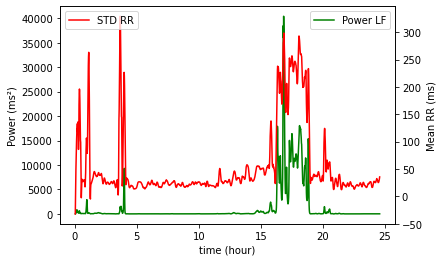

In [153]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, lf_smooth,'g', label='Power LF')
plt.legend()
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,stdrr_smooth,'r', label='STD RR')
ax.set_xlabel('time (hour)')
ax.set_ylabel('Power (ms²)')
ax2.set_ylabel('Mean RR (ms)')
plt.legend(loc='upper left')
plt.draw()

- LFn with mean RR

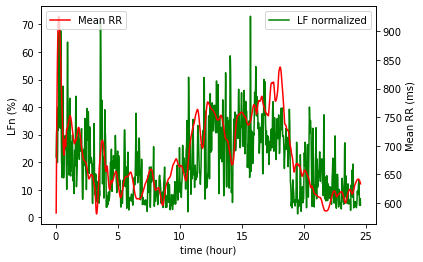

In [154]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, lfn_smooth,'g', label='LF normalized')
plt.legend()
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,meanrr_smooth,'r', label='Mean RR')
ax.set_xlabel('time (hour)')
ax.set_ylabel('LFn (%)')
ax2.set_ylabel('Mean RR (ms)')
plt.legend(loc='upper left')
plt.draw()

- Max RR with diastolic pressure

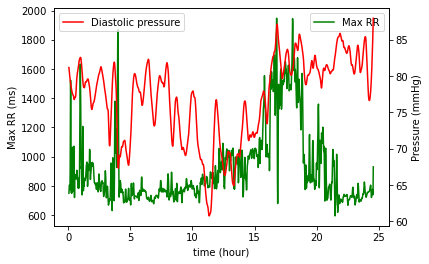

In [155]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, max_smooth,'g', label='Max RR')
plt.legend()
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,pdia_smooth,'r', label='Diastolic pressure')
ax.set_xlabel('time (hour)')
ax.set_ylabel('Max RR (ms)')
ax2.set_ylabel('Pressure (mmHg)')
plt.legend(loc='upper left')
plt.draw()

#### Normalisation 

In [156]:
# max
max_norm=(max_smooth-min(max_smooth))/(max(max_smooth)-min(max_smooth))
plt.plot(data['#time']/3600, max_norm+1, label='Max RR normalized')

# psys 
psys_norm=(psys_smooth-min(psys_smooth))/(max(psys_smooth)-min(psys_smooth))
plt.plot(data['#time']/3600, psys_norm-1, label='Systolic pressure normalized')

# heart rate 
hr_norm=(hr_smooth-min(hr_smooth))/(max(hr_smooth)-min(hr_smooth))
plt.plot(data['#time']/3600, hr_norm, label='Heart rate normalized')

# power VLF 
vlf_norm=(vlf_smooth-min(vlf_smooth))/(max(vlf_smooth)-min(vlf_smooth))
plt.plot(data['#time']/3600, vlf_norm+2, label='VLF normalized')

plt.xlabel('time (hour)')
plt.ylabel('A.U')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

## Zoom visualisation 

Let's visulize our features during few hours.

### Data

#### VLF

(0.0, 500.0)

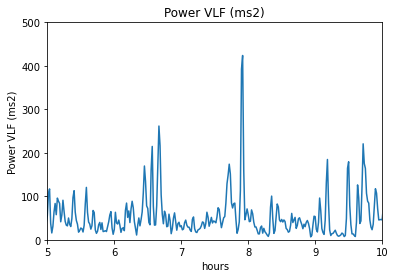

In [157]:
var='Power VLF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,data[var])
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([5,10])
plt.ylim([0,500])

#### LF

(0.0, 100.0)

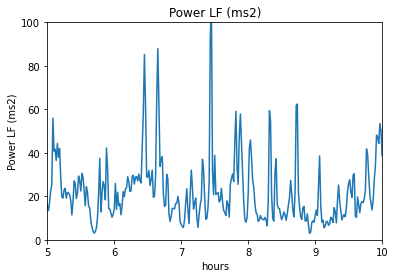

In [158]:
var='Power LF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,data[var])
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([5,10])
plt.ylim([0,100])

#### HF

(0.0, 2000.0)

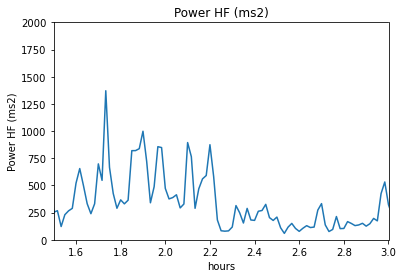

In [159]:
var='Power HF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,data[var])
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([1.5,3])
plt.ylim([0,2000])

### Corrected and smoothed

#### VLF

(0.0, 500.0)

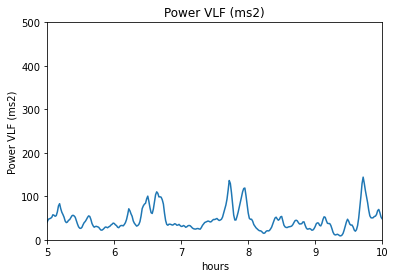

In [160]:
var='Power VLF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,vlf_smooth)
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([5,10])
plt.ylim([0,500])

#### LF

(0.0, 100.0)

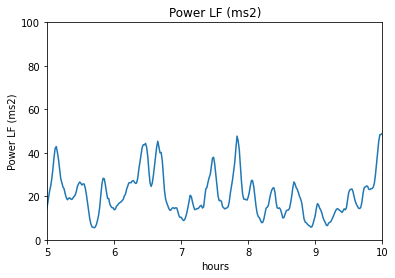

In [161]:
var='Power LF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,lf_smooth)
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([5,10])
plt.ylim([0,100])

#### HF

(0.0, 1500.0)

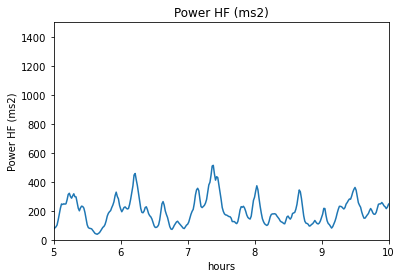

In [162]:
var='Power HF (ms2)'
plt.figure()
plt.plot(data['#time']/60/60,hf_smooth)
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)
plt.xlim([5,10])
plt.ylim([0,1500])

We can see that our signals are less noisy after smoothing.